In [71]:
import os
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [72]:
path_1 = '../tucker_error.csv'
path_2 = '../tucker_error_2.csv'

df = pd.concat([pd.read_csv(path_1), pd.read_csv(path_2)])
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,name,rank_0,rank_1,rec_error,rel_error,energy_error,fast
0,encoder.stages.0.0.convs.0.all_modules.0,1,1,2.449475,0.645357,0.416486,1
1,encoder.stages.0.0.convs.0.all_modules.0,2,1,2.107415,0.555235,0.308286,1
2,encoder.stages.0.0.convs.0.all_modules.0,4,1,1.345862,0.354591,0.125735,1
3,encoder.stages.0.0.convs.0.all_modules.0,6,1,0.786979,0.207344,0.042991,1
4,encoder.stages.0.0.convs.0.all_modules.0,8,1,0.570782,0.150382,0.022615,1


                                          name  rank_0  rank_1  rec_error  \
7472  encoder.stages.4.0.convs.0.all_modules.0       1       1  10.106873   
7473  encoder.stages.4.0.convs.0.all_modules.0       1      16  10.060831   
7474  encoder.stages.4.0.convs.0.all_modules.0       1      32  10.056524   
7475  encoder.stages.4.0.convs.0.all_modules.0       1      48  10.056476   
7476  encoder.stages.4.0.convs.0.all_modules.0       1      64  10.056441   

      rel_error  energy_error  fast  
7472   0.989179      0.978475     0  
7473   0.984673      0.969580     0  
7474   0.984251      0.968750     0  
7475   0.984246      0.968741     0  
7476   0.984243      0.968734     0  
256


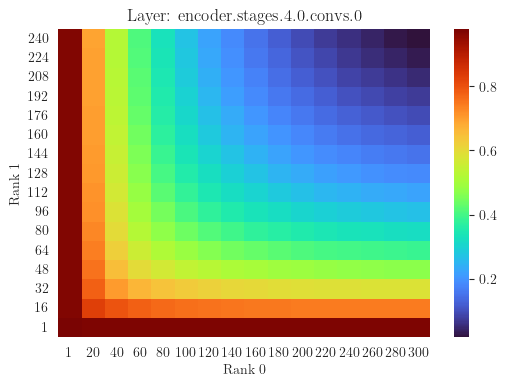

In [73]:
layer_ids = df.name.unique()

layer_name = layer_ids[8]
error = 'energy_error'
fast = 0
filtered_df = df[df.name == layer_name]
filtered_df = filtered_df.loc[df.fast == fast]
print(filtered_df.head())
print(len(filtered_df))

heatmap_data = filtered_df.pivot_table(index='rank_1', columns='rank_0', values=error)
heatmap_data.head()

# # Create the heatmap
plt.figure(figsize=(6, 4))
ax = sns.heatmap(heatmap_data, cmap='turbo')
ax.invert_yaxis()
layer_str = layer_name.replace('.all_modules.0', '')
plt.title(f'Layer: {layer_str}')
plt.xlabel('Rank 0')
plt.ylabel('Rank 1')
plt.show()
plt.close()

In [77]:
target_dir = '../plots/energy_heatmaps'

fast_idx = (0, 1)
error = 'energy_error'

for fast in fast_idx:
    for layer_name in layer_ids:
        filtered_df = df[df.name == layer_name]
        filtered_df = filtered_df.loc[df.fast == fast]
        
        heatmap_data = filtered_df.pivot_table(index='rank_1', columns='rank_0', values=error)
        heatmap_data.head()
        
        try:
            # # Create the heatmap
            plt.figure(figsize=(6, 4))
            ax = sns.heatmap(heatmap_data, cmap='turbo')
            ax.invert_yaxis()
            layer_str = layer_name.replace('.all_modules.0', '')
            plt.title(f'Layer: {layer_str}')
            plt.xlabel('Rank 0')
            plt.ylabel('Rank 1')
            save_dir = os.path.join(target_dir + ('_fast' if fast else ''))
            os.makedirs(save_dir, exist_ok=True)
            plt.savefig(os.path.join(save_dir, layer_str + '.pdf'))
            plt.close()
        except ValueError:
            print(f'Layer name {layer_name} faulty.')


Layer name encoder.stages.5.0.convs.0.all_modules.0 faulty.
Layer name encoder.stages.5.0.convs.1.all_modules.0 faulty.
Layer name decoder.stages.4.convs.0.all_modules.0 faulty.
Layer name decoder.stages.4.convs.1.all_modules.0 faulty.
Layer name decoder.transpconvs.4 faulty.


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>